In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1DMPJOQ6FIIFfqNcfqgSxMUaXFXNT9pR4

Downloading...
From: https://drive.google.com/uc?id=1DMPJOQ6FIIFfqNcfqgSxMUaXFXNT9pR4
To: /content/anime.csv
100% 936k/936k [00:00<00:00, 129MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=13pYRp9IBcmLqgfcnozdT10NsC06vr-2f

Downloading...
From (uriginal): https://drive.google.com/uc?id=13pYRp9IBcmLqgfcnozdT10NsC06vr-2f
From (redirected): https://drive.google.com/uc?id=13pYRp9IBcmLqgfcnozdT10NsC06vr-2f&confirm=t&uuid=56efca0c-f766-46db-99da-60b9b9535de8
To: /content/rating.csv
100% 111M/111M [00:00<00:00, 188MB/s] 


In [ ]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import OneHotEncoder


anime_data = pd.read_csv('anime.csv')
#display(anime_data.head(10))


#print(anime_data)

user_ratings_original = pd.read_csv('rating.csv')

genres_dummies = anime_data['genre'].str.get_dummies(sep=', ')

anime_data = pd.concat([anime_data, genres_dummies], axis=1)
#display(anime_data.head(10))

#display(anime_data.head(1).to_csv(index=False))

In [ ]:
display(user_ratings_original)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


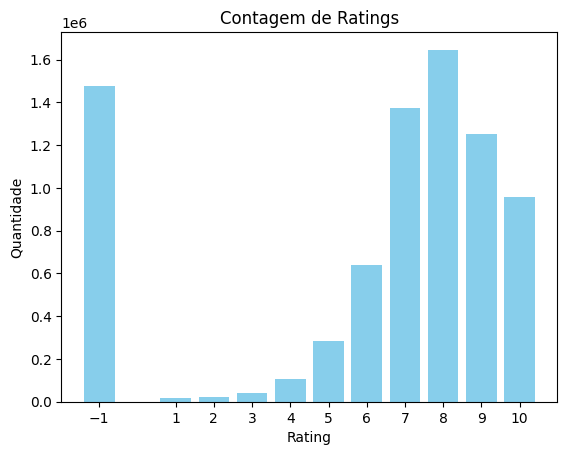

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame chamado 'data' com a coluna 'rating'
# data = pd.read_csv('seu_arquivo.csv')  # Carregue seus dados aqui

# Vamos criar um DataFrame de exemplo
# Contar a quantidade de cada valor de rating
rating_counts = user_ratings_original['rating'].value_counts().sort_index()

# Plotar o gráfico de barras
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Quantidade')
plt.title('Contagem de Ratings')
plt.xticks(rating_counts.index)  # Define os valores do eixo x para os valores de rating disponíveis
plt.show()

In [ ]:
user_ratings = user_ratings_original[user_ratings_original["rating"] != -1]
display(user_ratings)

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [ ]:
user_ratings = user_ratings.dropna()

In [ ]:
no_users = len(user_ratings['user_id'].unique().tolist())
no_animes = anime_data.shape[0]
no_ratings = user_ratings.shape[0]
preenchida = (no_ratings / (no_users * no_animes)) * 100
print(f'Numero de Usuarios: {no_users}\nNumero de Animes = {no_animes}\nNumero de Ratings = {no_ratings}\nPorcentagem Preenchida = {preenchida:.2f}%')

Numero de Usuarios: 69600
Numero de Animes = 12294
Numero de Ratings = 6337241
Porcentagem Preenchida = 0.74%


In [ ]:
def count_attribute_values(dataframe, attribute):
    value_counts = dataframe[attribute].value_counts().reset_index()
    value_counts.columns = [attribute, 'count']
    sorted_values = value_counts.sort_values(by='count', ascending=False)
    return sorted_values.values

# Chamando a função para contar a frequência dos valores na coluna 'Column'
result_array = count_attribute_values(user_ratings, 'user_id')

print("Valores e suas contagens (ordenados por frequência decrescente):")
print(result_array)

Valores e suas contagens (ordenados por frequência decrescente):
[[42635  3747]
 [53698  2905]
 [57620  2689]
 ...
 [41499     1]
 [46375     1]
 [22208     1]]


In [ ]:
rr = result_array[0:15000, 0]
print(rr.shape)

(15000,)


In [ ]:
no_ratings = user_ratings.shape[0]
#user_ratings = user_ratings[user_ratings['user_id'] < 15000]
print(f'Qte antiga = {no_users}\nQte Nova = { len(user_ratings["user_id"].unique().tolist()) }')
print(f'Qte antiga = {no_ratings}\nQte Nova = {user_ratings.shape[0]}')

Qte antiga = 69600
Qte Nova = 69600
Qte antiga = 6337241
Qte Nova = 6337241


In [ ]:
user_ratings = user_ratings[user_ratings['user_id'].isin(rr)]

In [ ]:
print(f'Qte antiga = {no_users}\nQte Nova = { len(user_ratings["user_id"].unique().tolist()) }')
print(f'Qte antiga = {no_ratings}\nQte Nova = {user_ratings.shape[0]}')
#display(user_ratings)

NameError: ignored

In [ ]:
!pip install surprise

In [ ]:
# Supondo que você tenha os DataFrames ratings e df
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
from surprise import accuracy

modelo = 'SVD' #@param ['SVD', 'KNN-random', 'KNN-sorted']
# Carregando os dados usando o Surprise
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(user_ratings[['user_id', 'anime_id', 'rating']], reader)
kf = KFold(n_splits=5, random_state=42)

# Dividindo os dados em conjunto de treinamento e teste
#trainset, testset = train_test_split(data, test_size=0.25)

# Usando algoritmo KNN com Surprise (usando cosine similarity)
'''
if modelo == 'KNN':
  sim_options = {
      'name': 'cosine',
      'user_based': True
  }
  algo = KNNBasic(sim_options=sim_options)

if modelo == 'SVD':
  algo = SVD()

# Treinando o modelo
algo.fit(trainset)

# Fazendo previsões para o conjunto de teste
predictions = algo.test(testset)

# Avaliando o desempenho do modelo (opcional)
from surprise import accuracy
accuracy.rmse(predictions)

'''





"\nif modelo == 'KNN':\n  sim_options = {\n      'name': 'cosine',\n      'user_based': True\n  }\n  algo = KNNBasic(sim_options=sim_options)\n\nif modelo == 'SVD':\n  algo = SVD()\n\n# Treinando o modelo\nalgo.fit(trainset)\n\n# Fazendo previsões para o conjunto de teste\npredictions = algo.test(testset)\n\n# Avaliando o desempenho do modelo (opcional)\nfrom surprise import accuracy\naccuracy.rmse(predictions)\n\n"

In [ ]:
metric = []
resultados = {'folds': ['fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5']}

i = 1

for trainset, testset in kf.split(data):
  #if i != 5:
    #i = i+1
    #continue
  #print(i)
  if modelo == 'KNN-random' or modelo == 'KNN-sorted':
    sim_options = {
      'name': 'cosine',
      'user_based': True
    }
    algo = KNNBasic(sim_options=sim_options)

  if modelo == 'SVD':
    algo = SVD()

  # train and test algorithm.
  algo.fit(trainset)
  predictions = algo.test(testset)
  # Compute and print Root Mean Squared Error
  RMSQ = accuracy.rmse(predictions)
  metric.append(RMSQ)
  i = i+1

resultados[modelo] = metric

RMSE: 1.1009


In [ ]:
resultados = {'folds': ['fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5'],
              'SVD': [1.1334005016717263, 1.1319598484239908, 1.133745163069113, 1.1332566885429523, 1.1326958766412623],
              'KNN-random': [1.468099020530469, 1.4689132314437618, 1.4639540637195878, 1.4698953022959353, 1.470125867815793],
              'KNN-sorted': [1.4036, 1.405286498055973, 1.404577612998645, 1.404109189345959, 1.4054395371859398]}

print(resultados)

{'folds': ['fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5'], 'SVD': [1.1334005016717263, 1.1319598484239908, 1.133745163069113, 1.1332566885429523, 1.1326958766412623], 'KNN-random': [1.468099020530469, 1.4689132314437618, 1.4639540637195878, 1.4698953022959353, 1.470125867815793], 'KNN-sorted': [1.4036, 1.405286498055973, 1.404577612998645, 1.404109189345959, 1.4054395371859398]}


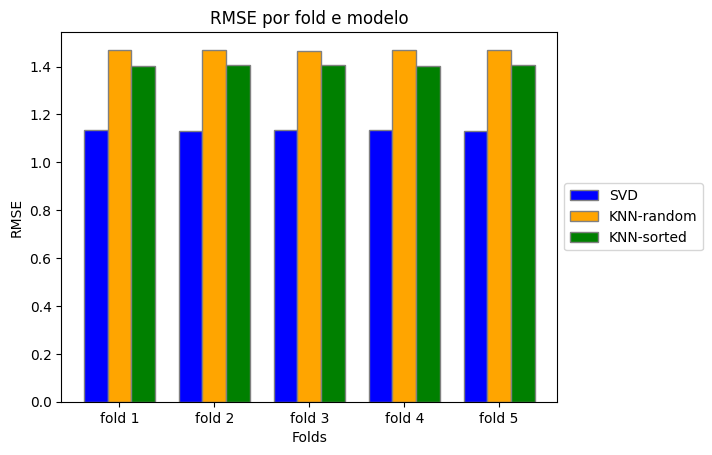

In [ ]:
import matplotlib.pyplot as plt

data = {
    'folds': ['fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5'],
    'SVD': [1.1334005016717263, 1.1319598484239908, 1.133745163069113, 1.1332566885429523, 1.1326958766412623],
    'KNN-random': [1.468099020530469, 1.4689132314437618, 1.4639540637195878, 1.4698953022959353, 1.470125867815793],
    'KNN-sorted': [1.4036, 1.405286498055973, 1.404577612998645, 1.404109189345959, 1.4054395371859398]
}

# Dados para plotagem
folds = data['folds']
svd_rmse = data['SVD']
knn_random_rmse = data['KNN-random']
knn_sorted_rmse = data['KNN-sorted']

# Largura das barras
bar_width = 0.25

# Posição das barras no eixo x
r1 = range(len(folds))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotagem das barras
plt.bar(r1, svd_rmse, color='blue', width=bar_width, edgecolor='grey', label='SVD')
plt.bar(r2, knn_random_rmse, color='orange', width=bar_width, edgecolor='grey', label='KNN-random')
plt.bar(r3, knn_sorted_rmse, color='green', width=bar_width, edgecolor='grey', label='KNN-sorted')

# Adicionando legendas e rótulos
plt.xlabel('Folds')
plt.ylabel('RMSE')
plt.title('RMSE por fold e modelo')
plt.xticks([r + bar_width for r in range(len(folds))], folds)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Exibição do gráfico
plt.show()

In [ ]:
user_id_to_recommend = 42635 #@param type: number
no_top_rated_animes = 10 #@param type: number
user_i_rated_itens = user_ratings[user_ratings['user_id'] == user_id_to_recommend]
rated_itens = user_i_rated_itens[['anime_id', 'rating']].sort_values(by='rating', ascending=False)
#display(rated_itens)
user_top_rated_itens = pd.DataFrame(columns=['name', 'predict rating', 'genre'])
print(f'Top {min(no_top_rated_animes, rated_itens.shape[0])} User {user_id_to_recommend} most rated animes:')
for i in range(min(no_top_rated_animes, rated_itens.shape[0])):
  anime = anime_data[anime_data['anime_id'] == rated_itens.iloc[i]['anime_id']]
  print(f'\t#{i+1}: {anime.iloc[0]["name"]} = {rated_itens.iloc[i]["rating"]}. {anime.iloc[0]["genre"]}' )
  #user_top_rated_itens.append(anime.iloc[0]['name'])

#print(user_top_rated_itens)
items_to_predict = anime_data[~anime_data['anime_id'].isin(user_ratings_original[user_ratings_original['user_id'] == user_id_to_recommend]['anime_id'])]['anime_id']
for item_id in items_to_predict:
    pred = algo.predict(user_id_to_recommend, item_id)
    if pred.est > 6.99:
      user_top_rated_itens.loc[len(user_top_rated_itens)] = {'name': anime_data[anime_data['anime_id'] == item_id].iloc[0]['name'], 'predict rating': round(pred.est,2), 'genre': anime_data[anime_data['anime_id'] == item_id].iloc[0]['genre'] }
    #print(f"Usuário {user_id_to_recommend} pode dar uma previsão de rating {pred.est:.2f} para o anime de ID {anime_data[anime_data['anime_id'] == item_id].iloc[0]['name']}")

display(user_top_rated_itens.sort_values(by='predict rating', ascending=False).head(5))

Top 10 User 42635 most rated animes:
	#1: Tsumiki no Ie = 10. Drama
	#2: Zankyou no Terror = 10. Psychological, Thriller
	#3: Wolf&#039;s Rain = 10. Action, Adventure, Drama, Fantasy, Mystery, Sci-Fi
	#4: Boku dake ga Inai Machi = 10. Mystery, Psychological, Seinen, Supernatural
	#5: Colorful (Movie) = 10. Drama, Slice of Life, Supernatural
	#6: Shiki = 10. Mystery, Supernatural, Thriller, Vampire
	#7: Hotaru no Haka = 10. Drama, Historical
	#8: Monster = 10. Drama, Horror, Mystery, Police, Psychological, Seinen, Thriller
	#9: Death Billiards = 10. Drama, Game, Mystery, Psychological, Thriller
	#10: Wolf&#039;s Rain OVA = 10. Adventure, Drama, Psychological, Sci-Fi, Supernatural


,name,predict rating,genre
3,Kizumonogatari II: Nekketsu-hen,8.09,"Action, Mystery, Supernatural, Vampire"
0,Kimi no Na wa.,8.03,"Drama, Romance, School, Supernatural"
46,Ginga Eiyuu Densetsu Gaiden: Rasen Meikyuu,7.85,"Drama, Military, Sci-Fi, Space"
15,Shelter,7.85,"Music, Sci-Fi"
75,Mobile Suit Gundam Wing: Endless Waltz,7.82,"Action, Drama, Mecha, Military, Sci-Fi, Space"
